In [11]:
import pandas as pd 

In [13]:
file_path = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt'
df = pd.read_csv(file_path, delimiter=r'\s+', comment='%', header=None, skiprows=41)


In [15]:
import requests
import os

# URL del archivo
url = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt'

# Ruta de destino (ajustada a la ruta proporcionada)
local_path = r'C:\Users\JUAN DIAZ\Desktop\Projects\DataNoob\data\Weather_data\Land_and_Ocean_complete.txt'


# Descargar el archivo
response = requests.get(url)
with open(local_path, 'wb') as file:
    file.write(response.content)

print(f"Archivo descargado y guardado en '{local_path}'")




Archivo descargado y guardado en 'C:\Users\JUAN DIAZ\Desktop\Projects\DataNoob\data\Weather_data\Land_and_Ocean_complete.txt'


In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1850,1,-0.756,0.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.213,0.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.354,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.584,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.626,0.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#I need the headers

import requests
url = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt'

# Send an HTTP request to get the file content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Split the content into lines
    lines = response.text.splitlines()
    
    # Print all lines
    for line in lines:
        pass
else:
    print(f"Failed to retrieve the file. Status code: {response.status_code}")


In [37]:
# Print lines with row numbers
for index, line in enumerate(lines, start=1):
        print(f"{index}: {line}")
else:
    print(f"Failed to retrieve the file. Status code: {response.status_code}")

1: % This file contains a detailed summary of the changes in Earth's global average
2: % surface temperature estimated by combining the Berkeley Earth land-surface
3: % temperature field with a reinterpolated version of the HadSST ocean temperature 
4: % field.  
5: % The current citation for this dataset is: 
6: % 
7: %    Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature
8: %    Record, Earth Syst. Sci. Data, 12, 3469ï¿½3479, 
9: %    https://doi.org/10.5194/essd-12-3469-2020, 2020.
10: % 
11: % The dataset differs slightly from the dataset as described in the citation as 
12: % HadSST3 has been replaced with the newer HadSST4, and associated interpolation 
13: % parameters have been refit accordingly.  No other changes in methods were needed 
14: % when moving to the new version of HadSST. 
15: % 
16: % Two versions of this average are reported.  These differ in how they treat 
17: % locations with sea ice.  In the first version, temperature anomalies in the

In [55]:
# Extract rows 84 and 85
row_84 = lines[83]
row_85 = lines[84]

# Print
print(f"Row 84: {row_84}")
print(f"Row 85: {row_85}")

Row 84: %                  Monthly          Annual          Five-year        Ten-year        Twenty-year
Row 85: % Year, Month,  Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.


In [75]:
# Clean both rows (remove '%' and strip extra spaces)
row_84_clean = row_84.replace('%', '').strip()
row_85_clean = row_85.replace('%', '').strip()

# Combine the cleaned row 84 and row 85 into a list of column names
combined_columns = (row_85_clean + ' ' + row_84_clean).split()

# Clean the column names further (remove commas and periods)
headers = [col.replace(',', '').replace('.', '') for col in combined_columns]

# Print the headers for debugging purposes
print("Headers:", headers)



Headers: ['Year', 'Month', 'Anomaly', 'Unc', 'Anomaly', 'Unc', 'Anomaly', 'Unc', 'Anomaly', 'Unc', 'Anomaly', 'Unc', 'Monthly', 'Annual', 'Five-year', 'Ten-year', 'Twenty-year']


In [77]:
# Step 3: Attach the cleaned headers (column names) to the DataFrame
df.columns = headers

ValueError: Length mismatch: Expected axis has 12 elements, new values have 17 elements

In [79]:
# Create a new list for the organized headers
organized_headers = [
    headers[0],          # 'Year'
    headers[1],          # 'Month'
    f"{headers[12]} {headers[2]}",    # 'Monthly Anomaly'
    f"{headers[12]} {headers[3]}",    # 'Monthly Unc'
    f"{headers[13]} {headers[4]}",    # 'Annual Anomaly'
    f"{headers[13]} {headers[5]}",    # 'Annual Unc'
    f"{headers[14]} {headers[6]}",    # 'Five-year Anomaly'
    f"{headers[14]} {headers[7]}",    # 'Five-year Unc'
    f"{headers[15]} {headers[8]}",    # 'Ten-year Anomaly'
    f"{headers[15]} {headers[9]}",    # 'Ten-year Unc'
    f"{headers[16]} {headers[10]}",   # 'Twenty-year Anomaly'
    f"{headers[16]} {headers[11]}"    # 'Twenty-year Unc'
]

# Print each organized header with its index
for index, header in enumerate(organized_headers):
    print(f"Index: {index}, Header: {header}")


Index: 0, Header: Year
Index: 1, Header: Month
Index: 2, Header: Monthly Anomaly
Index: 3, Header: Monthly Unc
Index: 4, Header: Annual Anomaly
Index: 5, Header: Annual Unc
Index: 6, Header: Five-year Anomaly
Index: 7, Header: Five-year Unc
Index: 8, Header: Ten-year Anomaly
Index: 9, Header: Ten-year Unc
Index: 10, Header: Twenty-year Anomaly
Index: 11, Header: Twenty-year Unc


In [81]:
print(f"Number of columns in the dataset: {df.shape[1]}")
print(f"Number of headers: {len(organized_headers)}")

Number of columns in the dataset: 12
Number of headers: 12


In [83]:
print(organized_headers)

['Year', 'Month', 'Monthly Anomaly', 'Monthly Unc', 'Annual Anomaly', 'Annual Unc', 'Five-year Anomaly', 'Five-year Unc', 'Ten-year Anomaly', 'Ten-year Unc', 'Twenty-year Anomaly', 'Twenty-year Unc']


In [85]:
# Print index and header
for index, organized_headers in enumerate(organized_headers):
    print(f"Index: {index}, Header: {organized_headers}")


Index: 0, Header: Year
Index: 1, Header: Month
Index: 2, Header: Monthly Anomaly
Index: 3, Header: Monthly Unc
Index: 4, Header: Annual Anomaly
Index: 5, Header: Annual Unc
Index: 6, Header: Five-year Anomaly
Index: 7, Header: Five-year Unc
Index: 8, Header: Ten-year Anomaly
Index: 9, Header: Ten-year Unc
Index: 10, Header: Twenty-year Anomaly
Index: 11, Header: Twenty-year Unc


In [97]:
# Define organized_headers as a list with each header explicitly listed
organized_headers = [
    'Year', 'Month', 'Monthly Anomaly', 'Monthly Unc', 
    'Annual Anomaly', 'Annual Unc', 'Five-year Anomaly', 'Five-year Unc', 
    'Ten-year Anomaly', 'Ten-year Unc', 'Twenty-year Anomaly', 'Twenty-year Unc'
]

# set df.columns if lengths match
if len(organized_headers) == len(df.columns):
    df.columns = organized_headers
    print("Headers set successfully!")
    print(df.head())
else:
    print("The number of headers still does not match the number of columns in the DataFrame.")


Headers set successfully!
   Year  Month  Monthly Anomaly  Monthly Unc  Annual Anomaly  Annual Unc  \
0  1850      1           -0.756        0.423             NaN         NaN   
1  1850      2           -0.213        0.514             NaN         NaN   
2  1850      3           -0.354        0.354             NaN         NaN   
3  1850      4           -0.584        0.293             NaN         NaN   
4  1850      5           -0.626        0.239             NaN         NaN   

   Five-year Anomaly  Five-year Unc  Ten-year Anomaly  Ten-year Unc  \
0                NaN            NaN               NaN           NaN   
1                NaN            NaN               NaN           NaN   
2                NaN            NaN               NaN           NaN   
3                NaN            NaN               NaN           NaN   
4                NaN            NaN               NaN           NaN   

   Twenty-year Anomaly  Twenty-year Unc  
0                  NaN              NaN  
1     

In [99]:
df.head()

,Year,Month,Monthly Anomaly,Monthly Unc,Annual Anomaly,Annual Unc,Five-year Anomaly,Five-year Unc,Ten-year Anomaly,Ten-year Unc,Twenty-year Anomaly,Twenty-year Unc
0,1850,1,-0.756,0.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.213,0.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.354,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.584,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.626,0.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Find the row index for the year 1980
row_index_1980 = df[df['Year'] == 1980].index[0]

# Display the row index
print(f"The row index for the year 1980 is: {row_index_1980}")

# Access the row containing the year 1980
row_data_1980 = df.loc[row_index_1980]

# Display the row data
print(row_data_1980)


The row index for the year 1980 is: 1560
Year                   1980.000
Month                     1.000
Monthly Anomaly           0.383
Monthly Unc               0.034
Annual Anomaly            0.338
Annual Unc                0.025
Five-year Anomaly         0.222
Five-year Unc             0.022
Ten-year Anomaly          0.177
Ten-year Unc              0.021
Twenty-year Anomaly       0.158
Twenty-year Unc           0.018
Name: 1560, dtype: float64


In [103]:
# df1 for years starting from 1980
df1 = df[df['Year'] >= 1980].reset_index(drop=True)
df1.head()

,Year,Month,Monthly Anomaly,Monthly Unc,Annual Anomaly,Annual Unc,Five-year Anomaly,Five-year Unc,Ten-year Anomaly,Ten-year Unc,Twenty-year Anomaly,Twenty-year Unc
0,1980,1,0.383,0.034,0.338,0.025,0.222,0.022,0.177,0.021,0.158,0.018
1,1980,2,0.470,0.036,0.346,0.027,0.218,0.021,0.176,0.021,0.159,0.018
2,1980,3,0.372,0.053,0.340,0.029,0.219,0.021,0.177,0.021,0.162,0.018
3,1980,4,0.425,0.049,0.333,0.030,0.219,0.021,0.177,0.021,0.164,0.018
4,1980,5,0.392,0.036,0.332,0.030,0.218,0.021,0.177,0.021,0.166,0.018


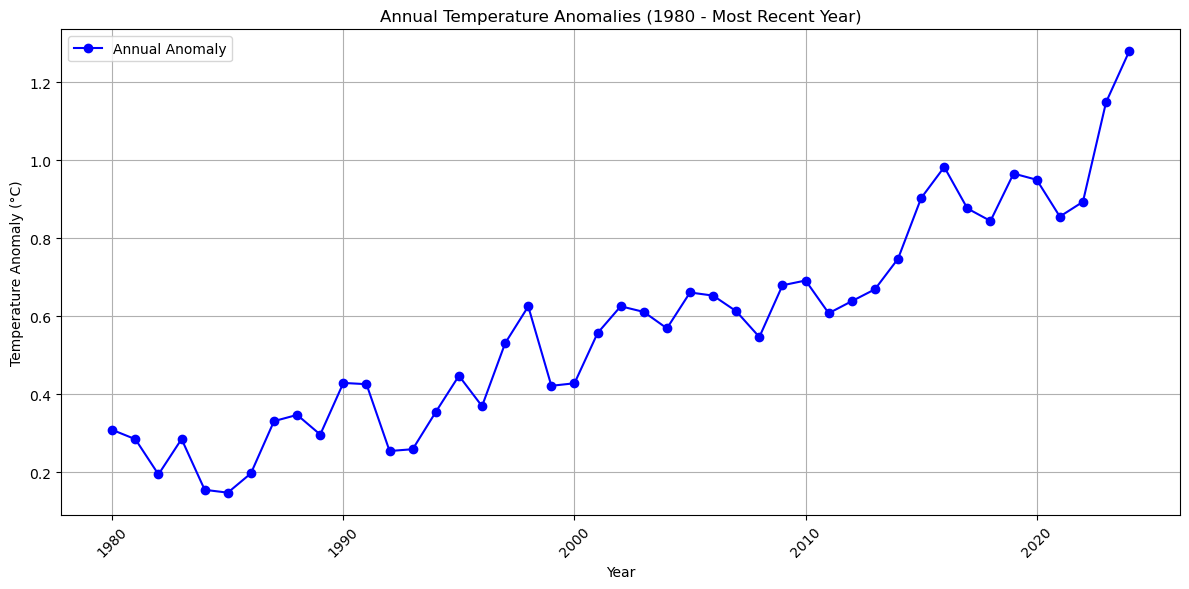

In [105]:
import matplotlib.pyplot as plt
# Group by year to calculate annual anomalies
annual_anomalies = df1.groupby('Year')['Annual Anomaly'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(annual_anomalies.index, annual_anomalies.values, marker='o', linestyle='-', color='b', label='Annual Anomaly')
plt.title('Annual Temperature Anomalies (1980 - Most Recent Year)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
